# Linear Regression

  h( x ) = w * x + b  
    
  here, b is the bias  
  x represents the feature vector  
  w represents the weight vector  

Importing Librarires

In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Linear Regression

In [12]:
class LinearRegression():
    def __init__(self, learning_rate, iterations):
        self.learning_rate = learning_rate
        self.iterations = iterations
    
    def fit(self, X, y):
        self.m, self.n = X.shape

        #Weight Initialization
        self.W = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.y = y

        #Gradient Descent Learning
        for i in range(self.iterations):
            self.update_weights()
        return self
    
    def update_weights(self):
        y_pred = self.predict(self.X)
        #Gradient Calculation
        dW = - ( 2 * ( self.X.T ).dot( self.y - y_pred )  ) / self.m 
        db = - 2 * np.sum( self.y - y_pred ) / self.m
        #Weight Update  
        self.W = self.W - self.learning_rate * dW 
        self.b = self.b - self.learning_rate * db 
          
        return self
    
    def predict(self, X):
        return X.dot(self.W) + self.b

# Driver Code

Predicted values  [ 39513.25 101154.42  62995.6 ]
Real values       [ 41000 103000  63000]
Trained W         7338.23
Trained b         29973.55


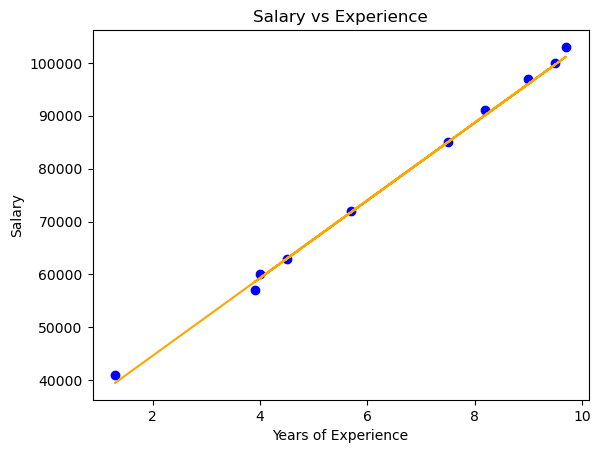

In [13]:
def main() : 
    # Importing dataset     
    df = pd.read_csv("experience_salary_data.csv") 
    X = df.iloc[:,:-1].values 
    y = df.iloc[:,1].values 

    # Splitting dataset into train and test set   
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0) 
      
    # Model training 
    model = LinearRegression(iterations = 1000, learning_rate = 0.01) 
    model.fit( X_train, y_train ) 

    # Prediction on test set  
    y_pred = model.predict( X_test )    
    print( "Predicted values ", np.round( y_pred[:3], 2 ) )  
    print( "Real values      ", y_test[:3] ) 
    print( "Trained W        ", round( model.W[0], 2 ) ) 
    print( "Trained b        ", round( model.b, 2 ) ) 
      
    # Visualization on test set  
    plt.scatter( X_test, y_test, color = 'blue' ) 
    plt.plot( X_test, y_pred, color = 'orange' ) 
    plt.title( 'Salary vs Experience' ) 
    plt.xlabel( 'Years of Experience' ) 
    plt.ylabel( 'Salary' ) 
    plt.show() 
     
if __name__ == "__main__" :  
    main()